# Malaria Diagnosis



diagnosing diseases requires effort, time, and people specialized in the field, and the possibility of human error in diagnosis is very high. Therefore, the need for an automated system for diagnosis has increased. In recent years, a lot of research has been produced where it combines artificial intelligence and machine learning with the medical field. One of the most dangerous diseases world around is Malaria, which could infect humans with parasites that are transmitted through the bites of infected female Anopheles mosquitoes. where the estimated deaths in 2019 reached about 409000 cases . Based on the purpose of early diagnosing of malaria this project will propose building a model using deep learning methods such as the convolution neural network (CNN) to classify the cells into, infected with malaria or unaffected. This project produces important information for those who are interested in diagnosing malaria using deep learning methods and for the medical community in general.

# The Dataset

The used dataset is microscopic cells images (27,558 cell images), labelled to parasitized(abnormal) and uninfected cells(normal), this dataset was collected by developing a mobile application that runs on a standard Android smartphone attached to a conventional light microscope. Figure 1 below shows a sample of the dataset. The dataset is a balanced dataset where the number of image samples of the parasitized class is the same as the number of uninfected class which equal 13779 images.

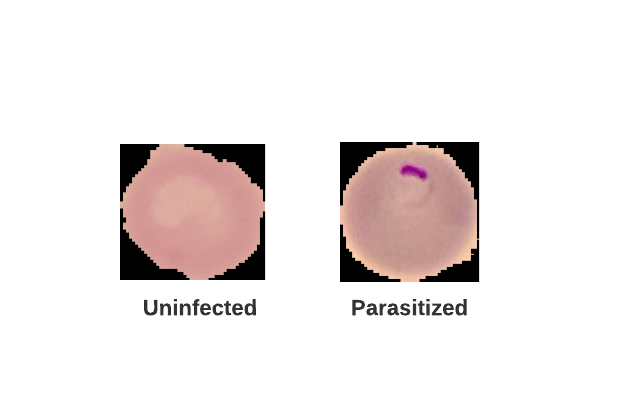

# The Design:

This project will aim to diagnose malaria based on detecting the parasitized cells using the deep learning method (CNN). Figure2 below provide an overview of the main methodology used in this project where the first step is preprocessing the dataset by resizing the images to fit the model, after that dividing the dataset into a training set to train the model, validation set, and testing set to evaluate the model.

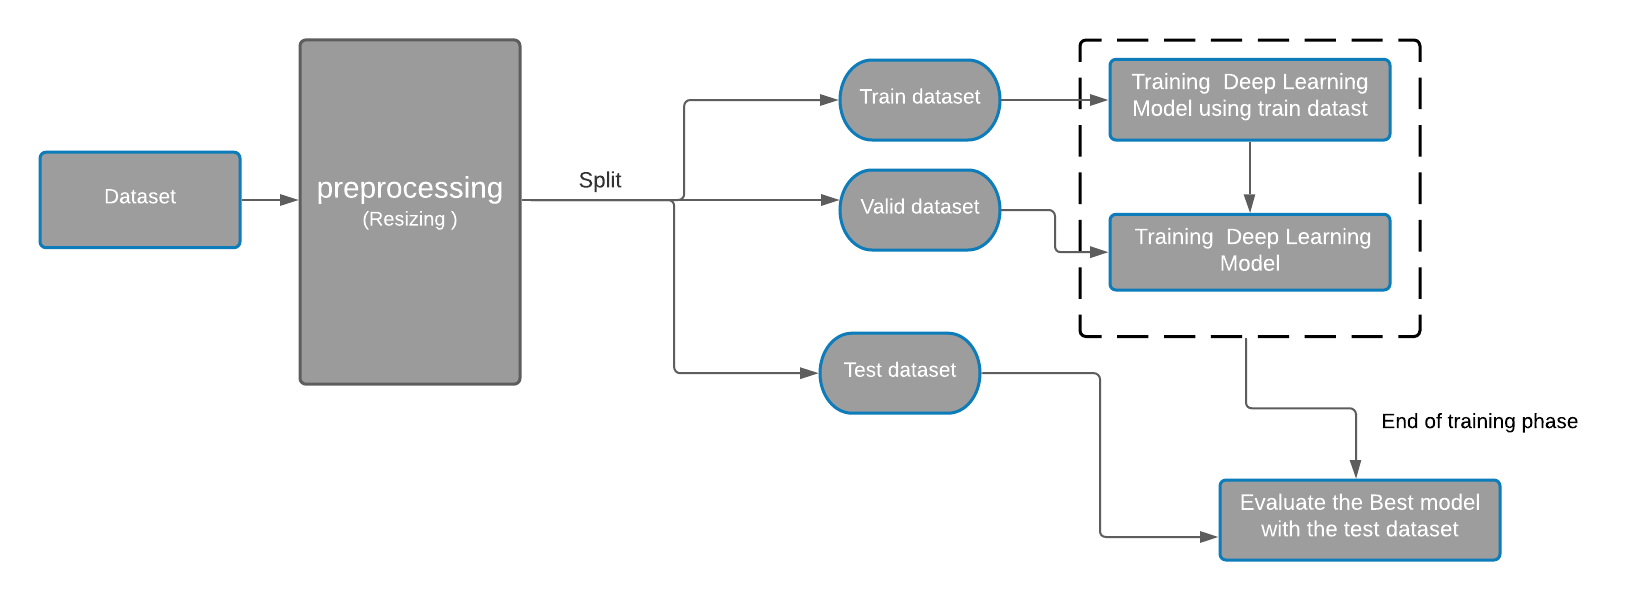

# The Model:

Based on the purpose of early and automated diagnosing of malaria this project build. In this project I Implement the images classification using the convolution neural network CNN with two different training strategies, the first model is the pre-trained CNN model (MobileNetV2), and the second model is CNN with training over the dataset from scratch 

# Tools:

•**Preprocessing:**

os , numpy, pandas, split-folders

•**The model:** 

keras, sklearn, tenseorflow

•**Visualization:**

matplotlib, seaborn



# 1-Import Packages

In [1]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

In [2]:

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from sklearn.metrics import accuracy_score, classification_report,recall_score,precision_score
from keras.models import Sequential,Model
from keras.layers import Activation
from keras.layers.core import Dense,Flatten,Dropout
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.xception import Xception

In [ ]:
import os
import tensorflow as tf

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
      print('GPU found')
else:
      print("No GPU found")

#  # No GPU found

# 2- Dataset

In [3]:
base_path ='cell_images.'
print(os.listdir(base_path))
print(f'Total Parasitized images {len(os.listdir(os.path.join(base_path, "Parasitized")))}')
print(f'Total Uninfected images {len(os.listdir(os.path.join(base_path, "Uninfected")))}')

['Parasitized', 'Uninfected']
Total Parasitized images 13780
Total Uninfected images 13780


From the pie chart below we can see that the dataset not suffering from the imbalance problem.

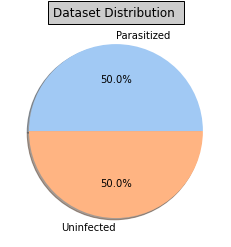

In [4]:
#p= [len(os.listdir(os.path.join(base_path, "Parasitized"))), len(os.listdir(os.path.join(base_path, "Uninfected")))]
colors = sns.color_palette('pastel')[0:3]
# Creating dataset
labe1 = ['Parasitized', 'Uninfected']
 
p= [len(os.listdir(os.path.join(base_path, "Parasitized"))), len(os.listdir(os.path.join(base_path, "Uninfected")))]
 
# Creating plot
fig = plt.figure(figsize =(7, 4))
plt.pie(p, labels = labe1,autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Dataset Distribution ", bbox={'facecolor':'0.8', 'pad':5})
# show plot
plt.show()

# 3- splitting the dataset into three parts with ratio of (75%,15%,10%)

* Training data(75%)

* Validation data (15%)

* Testing data(10%)

In [5]:
!pip install split-folders
import splitfolders

In [6]:
# splitting the data into train, validation and test set


if not os.path.exists('images22'):
 os.mkdir('images22')

# Using the splitfolders library to split the data and store it into images22 file

In [19]:
#os.mkdir('images22')  # directory to store the Training, Validation and Testing datasets
input_folder = base_path
output_folder = 'images22'
splitfolders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.75, 0.15,0.10), group_prefix=None) # default values

Copying files: 27560 files [01:39, 276.82 files/s]


In [7]:
# checking the newly created directory structure
input_path = 'images22'
for folder in os.listdir(input_path):
    print(folder)
    print(os.listdir(os.path.join(input_path, folder)))

test
['Parasitized', 'Uninfected']
train
['Parasitized', 'Uninfected']
val
['Parasitized', 'Uninfected']


In [8]:
train_dir = os.path.join(input_path, 'train')
test_dir = os.path.join(input_path, 'test')
val_dir = os.path.join(input_path, 'val')

In [9]:

train_Parasitized_dir = os.path.join(train_dir, 'Parasitized')
train_Uninfected_dir = os.path.join(train_dir, 'Uninfected')

validation_Parasitized_dir = os.path.join(val_dir, 'Parasitized')
validation_Uninfected_dir = os.path.join(val_dir, 'Uninfected')

test_Parasitized_dir = os.path.join(test_dir, 'Parasitized')
test_Uninfected_dir = os.path.join(test_dir, 'Uninfected')


In [10]:
# total number of train and validation images
training_img_count = len(os.listdir(train_Parasitized_dir) ) + len(os.listdir(train_Uninfected_dir) )     
validation_img_count = len(os.listdir(validation_Parasitized_dir) ) + len(os.listdir(validation_Uninfected_dir) )
Test_img_count = len(os.listdir(test_Parasitized_dir) ) + len(os.listdir(test_Uninfected_dir) )
print(f'total training images: {training_img_count}')
print(f'total validation images: {validation_img_count}')
print(f'total test images: {Test_img_count}') 

total training images: 20670
total validation images: 4134
total test images: 2756


# The pie chart below represents the dataset splitting .

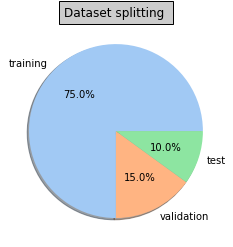

In [31]:
p1=[training_img_count,validation_img_count ,Test_img_count]
# Creating plot
labe2 = ['training', 'validation','test']
fig = plt.figure(figsize =(7, 4))
plt.pie(p1, labels = labe2,autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Dataset splitting ", bbox={'facecolor':'0.8', 'pad':5}) 
# show plot
plt.show()

# 4-  Training dataset sample  

Text(0.5, 1.0, 'Uninfected')

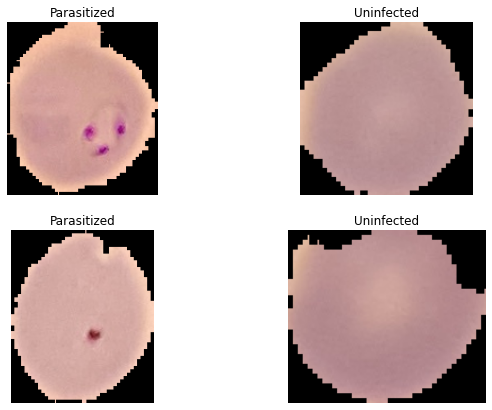

In [32]:
 rows = 2
columns = 2 
fig = plt.figure(figsize=(10, 7))
# reading images
Image1 = plt.imread('images22/train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')
Image2 = plt.imread('images22/train/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png')
Image3 = plt.imread('images22/train/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png')
Image4 = plt.imread('images22/train/Uninfected/C1_thinF_IMG_20150604_104722_cell_15.png')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Parasitized")
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Uninfected")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Parasitized")
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Uninfected")


In [9]:
#print the total number of emages in each file 
print('total training Parasitized images :', len(os.listdir(train_Parasitized_dir) ))
print('total training Uninfected images :', len(os.listdir(train_Uninfected_dir) ))

print('total validation Parasitized images :', len(os.listdir(validation_Parasitized_dir) ))
print('total validation Uninfected images :', len(os.listdir(validation_Uninfected_dir) ))

print('total test Parasitized images :', len(os.listdir(test_Parasitized_dir) ))
print('total test Uninfected images :', len(os.listdir(test_Uninfected_dir) ))

total training Parasitized images : 10335
total training Uninfected images : 10335
total validation Parasitized images : 2067
total validation Uninfected images : 2067
total test Parasitized images : 1378
total test Uninfected images : 1378


In [11]:
Parasitized=[len(os.listdir(train_Parasitized_dir)),len(os.listdir(validation_Parasitized_dir) ),len(os.listdir(test_Parasitized_dir))]
Uninfected=[len(os.listdir(train_Uninfected_dir)),len(os.listdir(validation_Uninfected_dir) ),len(os.listdir(test_Uninfected_dir))]

Parasitized
type(Uninfected)


list

# Creating a dataframe to illustrate the dataset in (training ,validation ,testing ) sets.

In [12]:
# Import pandas library
import pandas as pd
  
# initialize list of lists
data = [['Train', Parasitized[0],Uninfected[0]], ['Validation', Parasitized[1],Uninfected[1]], ['Test', Parasitized[2],Uninfected[2]]]
data

[['Train', 10335, 10335], ['Validation', 2067, 2067], ['Test', 1378, 1378]]

In [33]:
       
# Create the pandas DataFrame
df= pd.DataFrame(data, columns = ['sets','Parasitized', 'Uninfected'])
  
# print dataframe.
df


,sets,Parasitized,Uninfected
0,Train,10335,10335
1,Validation,2067,2067
2,Test,1378,1378


# Plotting the dataframe.

<AxesSubplot:xlabel='sets'>

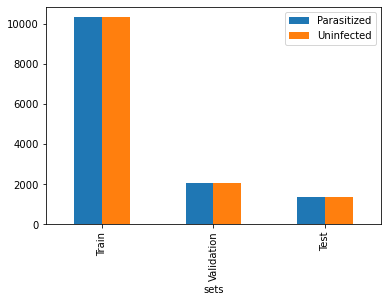

In [37]:
fig, ax = plt.subplots()
df.plot.bar(x='sets', ax=ax)

# Defining the hyperparameters

Based on fact that all the images have random sizes, we should resize all images to a uniform size(224,224) to fit the CNN models.

In [13]:
image_shape = [224, 224]
batch_size =64
epochs = 50

# 5- preprocessing the data :

* Using ImageDataGenerator to apply the pre-processing to the dataset by resizing the images to formal size (224,224). 
* also shuffling the data in training and validation sets. 
* I implement the rescaling to all data parts. the rescaling can improve the performance of the model.
* I decide to not apply data augmentation since the dataset is balanced and when I tried that, there is no remarkable change in the result.  

In [14]:

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (image_shape[0], image_shape[1]),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    shuffle = True
                                                   )

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                  target_size = (image_shape[0], image_shape[1]),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = True
                                                 )

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (image_shape[0], image_shape[1]),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary',
                                                  shuffle = False)

Found 20668 images belonging to 2 classes.
Found 4134 images belonging to 2 classes.
Found 2756 images belonging to 2 classes.


# 6- Building the models

To diagnose malaria automatically we implement two deep learning models based on CNN.the first model is the pre-trained CNN model (MobileNetV2), and the second model is CNN with training over the dataset from scratch

# First model 

Transfer learning is the method of using the knowledge earned from a previous trained AI model to another instead of gathering thousands of images for the  process of model training the from scratch.
the implementation of the model is done as follow:
* first: import the pre-trained model and remove the last layer .Then a flatten layer is added. Followed by Dense layer 64 with 'relu' as avtivation function . and add a dropout with rate of (0.5). The last layer is the classification layer,  where 'sigmoid' function is applied for classification.
* second: compile the model with defining the optimizer method (using SGD), and the loss function(binary_crossentropy), and selecting the accuracy as performance metrics.
* third: fit the model with training and validation data with epochs=5.

In [15]:
from tensorflow.keras import layers,models 
from tensorflow.keras import Model 

In [42]:
from tensorflow.keras.applications import MobileNetV2
base_model_1 = MobileNetV2(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [43]:
for layer in base_model_1.layers:
    layer.trainable = False

In [44]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model_1.output)

# Add a fully connected layer with 64 hidden units and ReLU activation
#x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation="sigmoid")(x)

model_1 = tf.keras.models.Model(base_model_1.input, x)
model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

# Second model

The second model is CNN which trained from scratch, constructed with different layers: (Input + Conv 1 + ReLU + Max Pooling+ BatchNormalization), (Conv 2 + ReLU + Max Pooling+ BatchNormalization), (Conv 3 + ReLU + Conv4+ ReLU+ Max Pooling+ BatchNormalization),( Conv 5 + ReLU + Max Pooling+ BatchNormalization), (Fully Connected + ReLU), (Output). 

In [20]:
model3 = models.Sequential()
#Input + Conv 1 + ReLU + Max Pooling
model3.add(layers.Conv2D(32,(5,5),activation='relu',padding='same',input_shape=(224, 224, 3)))
model3.add(layers.MaxPool2D(strides=4))
model3.add(layers.BatchNormalization())
# Conv 2 + ReLU + Max Pooling
model3.add(layers.Conv2D(64,(5,5),padding='same',activation='relu'))
model3.add(layers.MaxPool2D(strides=2))
model3.add(layers.BatchNormalization())
# Conv 3 + ReLU + Max Pooling
model3.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model3.add(layers.Conv2D(128,(3,3),activation='relu'))
model3.add(layers.MaxPool2D(strides=2))
model3.add(layers.BatchNormalization())
# Conv 4 + ReLU + Max Pooling
model3.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model3.add(layers.MaxPool2D(strides=2))
model3.add(layers.BatchNormalization())
# Fully Connected + ReLU
model3.add(layers.Flatten())
model3.add(layers.Dense(300, activation='relu'))
model3.add(layers.Dense(100, activation='relu'))
#Output
model3.add(layers.Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                        

# Compile the models 

In [45]:
model_1.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [21]:
model3.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9), loss = 'binary_crossentropy',metrics = ['accuracy'])

# Fit the model with a function

In [16]:
def fit_model(model):
    history = model.fit(
                        train_generator, 
                        validation_data=validation_generator,
                        batch_size=64,
                        #steps_per_epoch=len(train_generator)//50,
                        epochs=50,
                        callbacks=[
        keras.callbacks.EarlyStopping(patience=8, verbose=1, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(factor=.5, patience=3, verbose=1),
    ])
                        
    return history


# Plotting the accuracy and loss for each training and validation sets 

In [17]:
def plot_history(history):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(len(acc))
 
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.show()
    

    loss = history.history['loss']
    val_loss = history.history['val_loss'] 
    
    epochs = range(len(acc))
 
    plt.plot(epochs, loss, 'b', label='Training Lose')
    plt.plot(epochs, val_loss, 'r', label='Validation Lose')
    plt.title('Training and validation Lose')
    plt.legend()
    plt.figure()
    plt.show()

Epoch 1/50
323/323 [==============================] - 652s 2s/step - loss: 0.2968 - accuracy: 0.8785 - val_loss: 0.1768 - val_accuracy: 0.9315 - lr: 0.0010
Epoch 2/50
323/323 [==============================] - 677s 2s/step - loss: 0.2087 - accuracy: 0.9203 - val_loss: 0.1702 - val_accuracy: 0.9386 - lr: 0.0010
Epoch 3/50
323/323 [==============================] - 622s 2s/step - loss: 0.1807 - accuracy: 0.9346 - val_loss: 0.1664 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 4/50
323/323 [==============================] - 545s 2s/step - loss: 0.1712 - accuracy: 0.9380 - val_loss: 0.1700 - val_accuracy: 0.9405 - lr: 0.0010
Epoch 5/50
323/323 [==============================] - 502s 2s/step - loss: 0.1694 - accuracy: 0.9378 - val_loss: 0.1577 - val_accuracy: 0.9427 - lr: 0.0010
Epoch 6/50
323/323 [==============================] - 520s 2s/step - loss: 0.1536 - accuracy: 0.9444 - val_loss: 0.1815 - val_accuracy: 0.9366 - lr: 0.0010
Epoch 7/50
323/323 [==============================] - 490s 2s/st

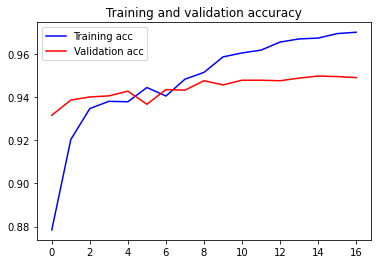

<Figure size 432x288 with 0 Axes>

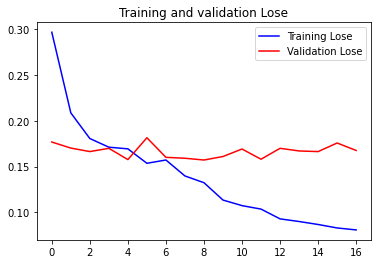

<Figure size 432x288 with 0 Axes>

In [48]:
history1 = fit_model(model_1)

plot_history(history1)

In [49]:
model_1.save('malaria_SDAIA_mobilNetV2.h5')

C:\Users\gagap\anaconda3\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 1/50
323/323 [==============================] - 147s 433ms/step - loss: 0.3162 - accuracy: 0.8521 - val_loss: 1.6049 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 2/50
323/323 [==============================] - 154s 475ms/step - loss: 0.1334 - accuracy: 0.9514 - val_loss: 0.1412 - val_accuracy: 0.9478 - lr: 0.0010
Epoch 3/50
323/323 [==============================] - 150s 465ms/step - loss: 0.1026 - accuracy: 0.9638 - val_loss: 0.1262 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 4/50
323/323 [==============================] - 157s 484ms/step - loss: 0.0873 - accuracy: 0.9679 - val_loss: 0.1301 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 5/50
323/323 [==============================] - 145s 448ms/step - loss: 0.0632 - accuracy: 0.9790 - val_loss: 0.1333 - val_accuracy: 0.9523 - lr: 0.0010
Epoch 6/50
323/323 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9830
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
323/323 [====================

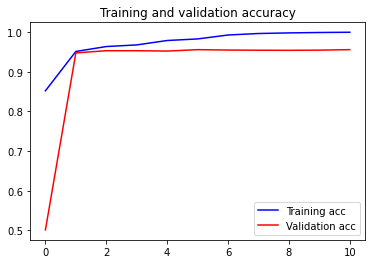

<Figure size 432x288 with 0 Axes>

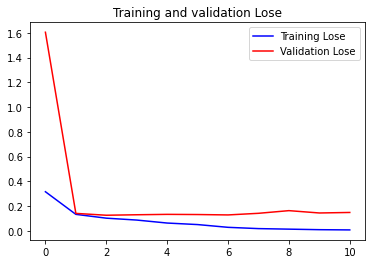

<Figure size 432x288 with 0 Axes>

In [18]:
history3 = fit_model(model3)

plot_history(history3)

In [20]:
model3.save('malaria_SDAIA_cnn2.h5')

# Evaluate the models 

In [50]:
model_1.evaluate(test_generator)

44/44 [==============================] - 38s 874ms/step - loss: 0.1513 - accuracy: 0.9456


[0.15133073925971985, 0.9455732703208923]

In [19]:
model3.evaluate(test_generator)

44/44 [==============================] - 8s 167ms/step - loss: 0.1257 - accuracy: 0.95681s - loss: 0.1


[0.12571026384830475, 0.9568215012550354]

# The predictions 

In [51]:
yp1 = model_1.predict(test_generator)

In [22]:
yp3 = model3.predict(test_generator)

In [52]:
y_pred_1 = []
for element in yp1:
    if element > 0.5:
        y_pred_1.append(1)
    else:
        y_pred_1.append(0)

In [23]:
y_pred_3 = []
for element in yp3:
    if element > 0.5:
        y_pred_3.append(1)
    else:
        y_pred_3.append(0)

In [53]:
labels_1=test_generator.labels
labels_1.shape

(2756,)

In [24]:
labels_3=test_generator.labels
labels_3.shape

(2756,)

# Accuracy,Recall,Precision,F1-score,Confusion Matrix

In [54]:
print(accuracy_score(labels_1,  y_pred_1))

0.9455732946298984


In [25]:
print(accuracy_score(labels_3,  y_pred_3))

0.956821480406386


In [57]:
print(classification_report(labels_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1378
           1       0.94      0.96      0.95      1378

    accuracy                           0.95      2756
   macro avg       0.95      0.95      0.95      2756
weighted avg       0.95      0.95      0.95      2756



In [28]:
print(classification_report(labels_3, y_pred_3))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1378
           1       0.95      0.96      0.96      1378

    accuracy                           0.96      2756
   macro avg       0.96      0.96      0.96      2756
weighted avg       0.96      0.96      0.96      2756



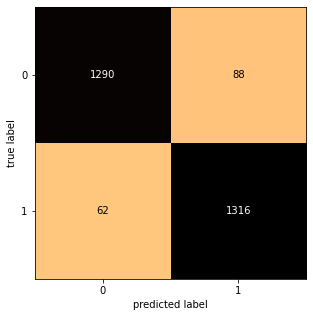

In [55]:

CM_1 = confusion_matrix(labels_1, y_pred_1)
from mlxtend.plotting import plot_confusion_matrix
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM_1 ,  figsize=(5, 5),cmap=plt.cm.copper_r)
plt.show()

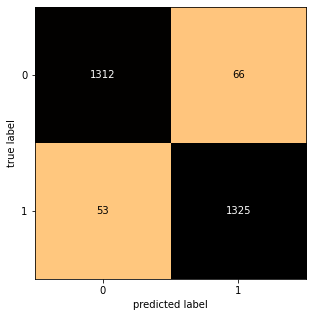

In [27]:
from sklearn.metrics import confusion_matrix , classification_report

CM_3 = confusion_matrix(labels_3, y_pred_3)
from mlxtend.plotting import plot_confusion_matrix
# plotting confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=CM_3 ,  figsize=(5, 5),cmap=plt.cm.copper_r)
plt.show()

In [32]:
# initialize list of lists
data_RESULT = [['MobileNetV2', 95], ['CNN', 96]]
data_RESULT

[['MobileNetV2', 95], ['CNN', 96]]

In [34]:
       
# Create the pandas DataFrame
df_RESULT= pd.DataFrame(data_RESULT, columns = ['Models','Accuarcy' ])
  
# print dataframe.
df_RESULT

,Models,Accuarcy
0,MobileNetV2,95
1,CNN,96


<AxesSubplot:xlabel='Models'>

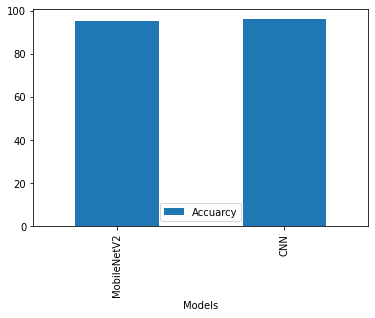

In [36]:
fig, ax = plt.subplots()
df_RESULT.plot.bar(x='Models',y='Accuarcy', ax=ax)